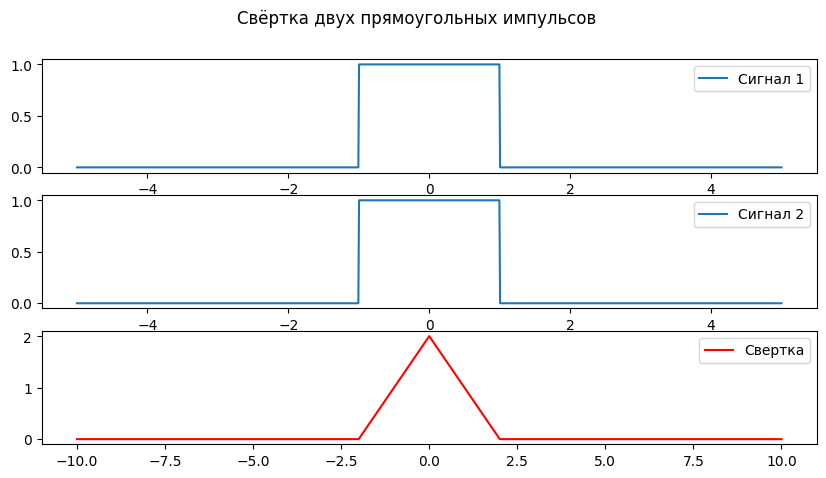

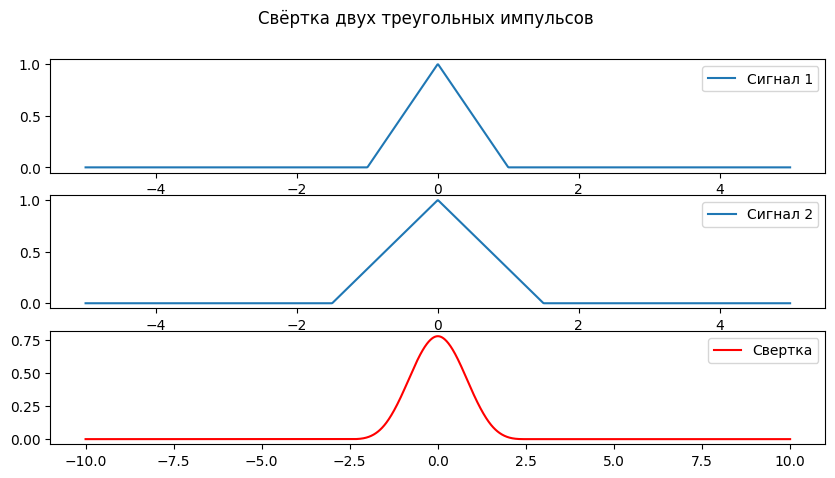

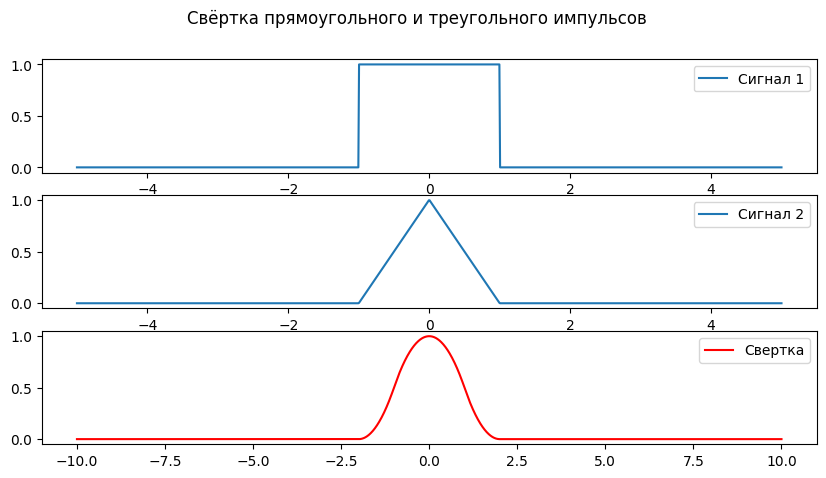

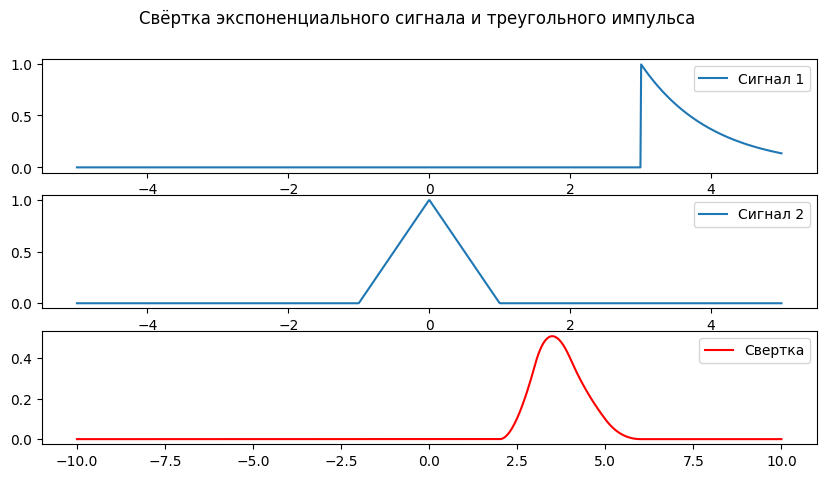

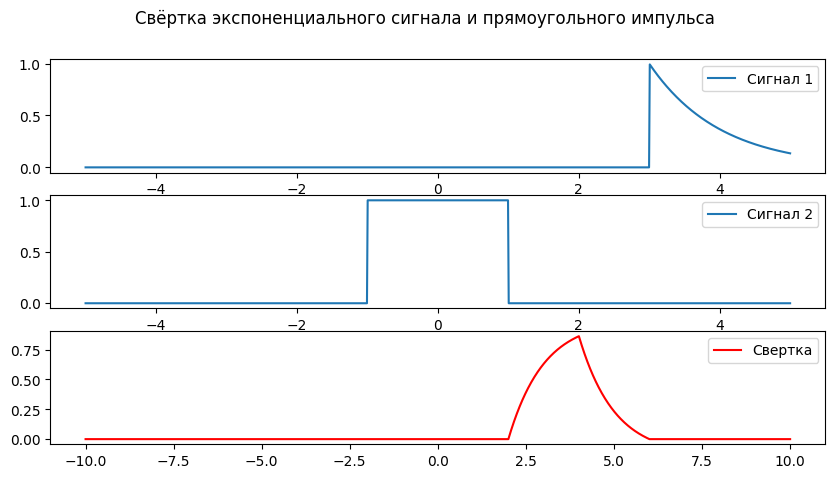

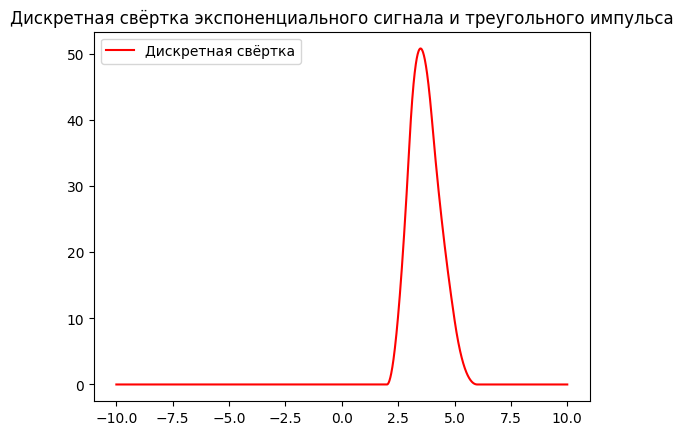

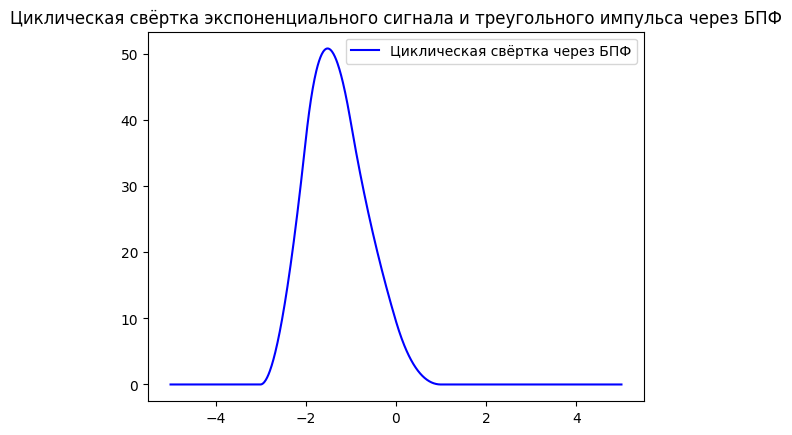

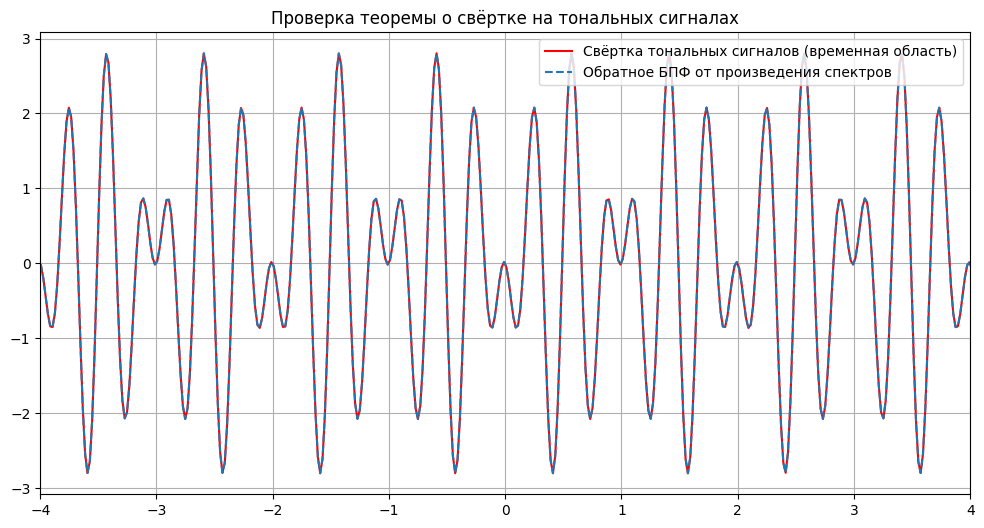

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, ifft

# Функция для построения свертки двух сигналов
def plot_convolution(t, x1, x2, title):
    conv_result = convolve(x1, x2, mode='full') * (t[1] - t[0])
    t_conv = np.linspace(2 * t[0], 2 * t[-1], len(conv_result))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 1, 1)
    plt.plot(t, x1, label='Сигнал 1')
    plt.legend()
    plt.subplot(3, 1, 2)
    plt.plot(t, x2, label='Сигнал 2')
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(t_conv, conv_result, label='Свертка', color='red')
    plt.legend()
    plt.suptitle(title)
    plt.show()

# 1. Свёртка двух прямоугольных импульсов
t = np.linspace(-5, 5, 1000)
rect1 = np.where((t >= -1) & (t <= 1), 1, 0)
rect2 = np.where((t >= -1) & (t <= 1), 1, 0)
plot_convolution(t, rect1, rect2, 'Свёртка двух прямоугольных импульсов')

# 2. Свёртка двух треугольных импульсов
def triangular_pulse(t, width):
    return np.maximum(1 - np.abs(t) / width, 0)

tri1 = triangular_pulse(t, 1)
tri2 = triangular_pulse(t, 1.5)
plot_convolution(t, tri1, tri2, 'Свёртка двух треугольных импульсов')

# 3. Свёртка прямоугольного и треугольного импульсов
plot_convolution(t, rect1, tri1, 'Свёртка прямоугольного и треугольного импульсов')

# 4. Сигнал с экспонентой
def exp_signal(t):
    return np.where(t < 3, 0, np.exp(-(t - 3)))

exp_sig = exp_signal(t)

# a) Свёртка экспоненты с треугольным импульсом (нечетный вариант)
plot_convolution(t, exp_sig, tri1, 'Свёртка экспоненциального сигнала и треугольного импульса')

# б) Свёртка экспоненты с прямоугольным импульсом (четный вариант)
plot_convolution(t, exp_sig, rect1, 'Свёртка экспоненциального сигнала и прямоугольного импульса')

# 5. Дискретная свёртка через определение
def discrete_convolution(x1, x2):
    N = len(x1)
    conv_result = np.zeros(2 * N - 1)
    for n in range(2 * N - 1):
        for k in range(N):
            if 0 <= n - k < N:
                conv_result[n] += x1[k] * x2[n - k]
    return conv_result

disc_conv = discrete_convolution(exp_sig, tri1)
t_disc = np.linspace(2 * t[0], 2 * t[-1], len(disc_conv))
plt.figure()
plt.plot(t_disc, disc_conv, label='Дискретная свёртка', color='red')
plt.legend()
plt.title('Дискретная свёртка экспоненциального сигнала и треугольного импульса')
plt.show()

# 6. Свёртка через БПФ
def fft_convolution(x1, x2):
    N = len(x1)  # Без расширения длины
    X1 = fft(x1)
    X2 = fft(x2)
    conv_result = np.real(ifft(X1 * X2))
    return conv_result

circular_conv = fft_convolution(exp_sig, tri1)
plt.figure()
plt.plot(t, circular_conv, label='Циклическая свёртка через БПФ', color='blue')
plt.legend()
plt.title('Циклическая свёртка экспоненциального сигнала и треугольного импульса через БПФ')
plt.show()

# 7. Проверка теоремы о свёртке на двух тональных сигналах
f1, f2 = 5, 7
tone1 = np.sin(2 * np.pi * f1 * t)
tone2 = np.sin(2 * np.pi * f2 * t)

# Свёртка через БПФ
fft_tone_conv = fft_convolution(tone1, tone2)
t_tone = np.linspace(2 * t[0], 2 * t[-1], len(fft_tone_conv))

# Проверка теоремы о свёртке: сравнение БПФ свёртки и произведения БПФ
X1 = fft(tone1, len(fft_tone_conv))
X2 = fft(tone2, len(fft_tone_conv))
conv_freq_domain = ifft(X1 * X2)

plt.figure(figsize=(12, 6))
plt.plot(t_tone, fft_tone_conv, label='Свёртка тональных сигналов (временная область)', color='red')
plt.plot(t_tone, np.real(conv_freq_domain), label='Обратное БПФ от произведения спектров', linestyle='dashed')
plt.legend()
plt.title('Проверка теоремы о свёртке на тональных сигналах')
plt.xlim(-4, 4)  # Увеличение масштаба по оси X
#plt.ylim(-1, 1)  # Увеличение масштаба по оси Y
plt.grid()
plt.show()
